In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('vao_flats.csv', index_col=0)

In [3]:
data.shape

(7062, 15)

In [4]:
data.head()

,N,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New
0,1338305,2,9000000,56.4,35.1,7.0,8.942096,22.0,1,1,1,0,2,5.0,0
1,1535194,2,52000000,92.0,42.0,18.0,5.830754,1.0,1,1,0,0,2,30.0,0
2,1711530,2,6500000,44.5,28.0,6.0,13.741006,13.0,1,0,1,0,7,9.0,0
3,1838610,3,6600000,52.3,36.1,6.0,16.486721,10.0,0,1,1,0,1,5.0,0
4,1986554,3,13200000,80.4,54.8,8.6,7.735389,10.0,0,1,1,1,7,8.0,0


In [5]:
data.tail()

,N,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New
7057,151977688,4,15999000,108.0,72.0,11.0,8.050940,15.0,1,1,1,0,2,7.0,0
7058,151978285,1,5990000,40.0,18.9,10.4,18.302028,10.0,0,0,0,1,19,24.0,0
7059,151978628,1,5300000,34.1,18.9,8.5,11.876061,10.0,0,1,0,1,3,5.0,0
7060,151978794,1,4650000,32.0,19.0,6.0,12.653934,15.0,1,0,1,1,4,9.0,0
7061,151978992,3,23500000,94.0,55.0,14.0,11.123828,3.0,1,1,1,1,15,24.0,0


# 1 Удаление дубликатов и переиндексация

Итак, ранее было выяснено, что в данных есть дубликаты. Удалим их.

In [6]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True, drop=True)
len(data)

6994

In [7]:
data.tail()

,N,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New
6989,151977688,4,15999000,108.0,72.0,11.0,8.050940,15.0,1,1,1,0,2,7.0,0
6990,151978285,1,5990000,40.0,18.9,10.4,18.302028,10.0,0,0,0,1,19,24.0,0
6991,151978628,1,5300000,34.1,18.9,8.5,11.876061,10.0,0,1,0,1,3,5.0,0
6992,151978794,1,4650000,32.0,19.0,6.0,12.653934,15.0,1,0,1,1,4,9.0,0
6993,151978992,3,23500000,94.0,55.0,14.0,11.123828,3.0,1,1,1,1,15,24.0,0


Теперь можно сделать переиндексацию по столбцу N (он все равно ни на что не будет влиять, это же просто номер ссылки на страницу, а не какая-то дата временного ряда).

In [8]:
data.set_index('N', inplace=True)

In [9]:
data.shape

(6994, 14)

In [10]:
data.head()

,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New
N,,,,,,,,,,,,,,
1338305,2,9000000,56.4,35.1,7.0,8.942096,22.0,1,1,1,0,2,5.0,0
1535194,2,52000000,92.0,42.0,18.0,5.830754,1.0,1,1,0,0,2,30.0,0
1711530,2,6500000,44.5,28.0,6.0,13.741006,13.0,1,0,1,0,7,9.0,0
1838610,3,6600000,52.3,36.1,6.0,16.486721,10.0,0,1,1,0,1,5.0,0
1986554,3,13200000,80.4,54.8,8.6,7.735389,10.0,0,1,1,1,7,8.0,0


In [11]:
data.tail()

,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New
N,,,,,,,,,,,,,,
151977688,4,15999000,108.0,72.0,11.0,8.050940,15.0,1,1,1,0,2,7.0,0
151978285,1,5990000,40.0,18.9,10.4,18.302028,10.0,0,0,0,1,19,24.0,0
151978628,1,5300000,34.1,18.9,8.5,11.876061,10.0,0,1,0,1,3,5.0,0
151978794,1,4650000,32.0,19.0,6.0,12.653934,15.0,1,0,1,1,4,9.0,0
151978992,3,23500000,94.0,55.0,14.0,11.123828,3.0,1,1,1,1,15,24.0,0


# 2 Описание признаков

In [12]:
bin_features = ['Walk', 'Brick', 'Tel', 'Bal', 'New']
num_features = ['Rooms', 'Price', 'Totsp', 'Livesp', 'Kitsp', 'Dist', 'Metrdist', 'Floor', 'Nfloors']

In [13]:
data[bin_features].astype(object).describe()

,Walk,Brick,Tel,Bal,New
count,6994,6994,6994,6994,6994
unique,2,2,2,2,2
top,1,0,0,1,0
freq,5122,4265,3854,5036,6689


Как много вторички!

In [14]:
data[num_features].describe()

,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Floor,Nfloors
count,6994.000000,6.994000e+03,6994.00000,6872.000000,6717.000000,6994.000000,6594.000000,6994.000000,6981.000000
mean,2.072205,1.119418e+07,57.79328,34.775466,9.026440,12.098965,10.960570,6.419502,12.197106
std,0.916860,1.183589e+07,30.13319,19.564689,4.500026,3.123681,5.652693,5.213107,6.984887
min,1.000000,2.500000e+06,12.00000,1.000000,1.000000,4.981407,1.000000,1.000000,1.000000
25%,1.000000,5.900000e+06,39.00000,20.300000,6.000000,9.431764,7.000000,3.000000,8.000000
50%,2.000000,7.500000e+06,50.20000,30.000000,8.000000,12.390763,10.000000,5.000000,10.000000
75%,3.000000,1.150000e+07,67.00000,43.000000,10.000000,14.221714,15.000000,9.000000,16.000000
max,6.000000,3.633333e+08,500.00000,500.000000,100.000000,30.545710,46.000000,34.000000,39.000000


# 3 Заполнение пропусков

Из таблиц описания признаков видно, что пропуски есть только в столбцах Livesp, Kitsp, Metrdist и Nfloors, и их немного. Заполним пропуски в Livesp, Kitsp и Metrdist средним арифметическим, а в Nfloors - медианой.

In [15]:
data['Livesp'] = data['Livesp'].fillna(data['Livesp'].mean())
data['Kitsp'] = data['Kitsp'].fillna(data['Kitsp'].mean())
data['Metrdist'] = data['Metrdist'].fillna(data['Metrdist'].mean())
data['Nfloors'] = data['Nfloors'].fillna(data['Nfloors'].median())

In [16]:
data[num_features].describe()

,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Floor,Nfloors
count,6994.000000,6.994000e+03,6994.00000,6994.000000,6994.00000,6994.000000,6994.000000,6994.000000,6994.000000
mean,2.072205,1.119418e+07,57.79328,34.775466,9.02644,12.098965,10.960570,6.419502,12.193023
std,0.916860,1.183589e+07,30.13319,19.393275,4.41000,3.123681,5.488646,5.213107,6.979034
min,1.000000,2.500000e+06,12.00000,1.000000,1.00000,4.981407,1.000000,1.000000,1.000000
25%,1.000000,5.900000e+06,39.00000,20.700000,6.00000,9.431764,7.000000,3.000000,8.000000
50%,2.000000,7.500000e+06,50.20000,30.600000,8.30000,12.390763,10.000000,5.000000,10.000000
75%,3.000000,1.150000e+07,67.00000,43.000000,10.00000,14.221714,15.000000,9.000000,16.000000
max,6.000000,3.633333e+08,500.00000,500.000000,100.00000,30.545710,46.000000,34.000000,39.000000


# 4 Распределения признаков

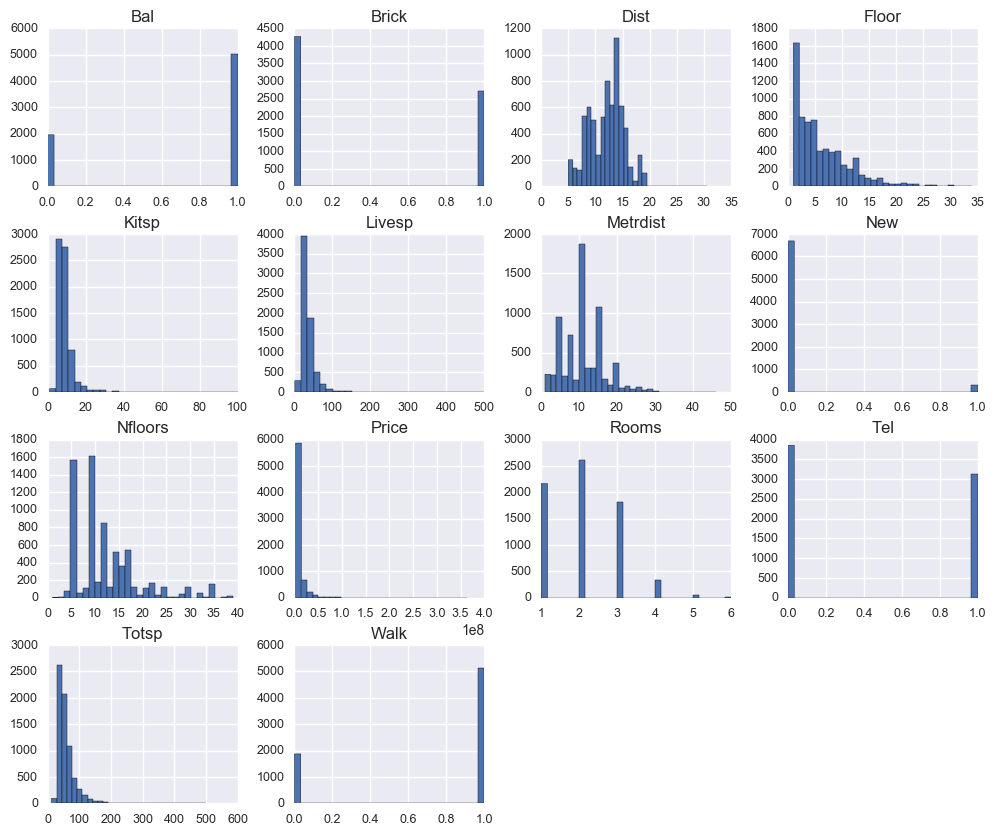

In [17]:
data.hist(xlabelsize=9, ylabelsize=9, figsize=(12, 10), bins=30);

Некоторые признаки удобнее прологарифмировать, в том числе и целевую переменную (Price) - это помогает немного избавиться от гетероскедастичности наблюдений.

In [18]:
data.columns

Index(['Rooms', 'Price', 'Totsp', 'Livesp', 'Kitsp', 'Dist', 'Metrdist',
       'Walk', 'Brick', 'Tel', 'Bal', 'Floor', 'Nfloors', 'New'],
      dtype='object')

In [19]:
data_log = data.copy()
data_log.insert(1, 'log(Price)', np.log(data_log['Price']))
data_log.insert(3, 'log(Totsp)', np.log(data_log['Totsp']))
data_log.insert(5, 'log(Livesp)', np.log(data_log['Livesp']))
data_log.insert(7, 'log(Kitsp)', np.log(data_log['Kitsp']))
data_log.drop(['Price', 'Totsp', 'Livesp', 'Kitsp'], axis=1, inplace=True)
data_log.columns

Index(['Rooms', 'log(Price)', 'log(Totsp)', 'log(Livesp)', 'log(Kitsp)',
       'Dist', 'Metrdist', 'Walk', 'Brick', 'Tel', 'Bal', 'Floor', 'Nfloors',
       'New'],
      dtype='object')

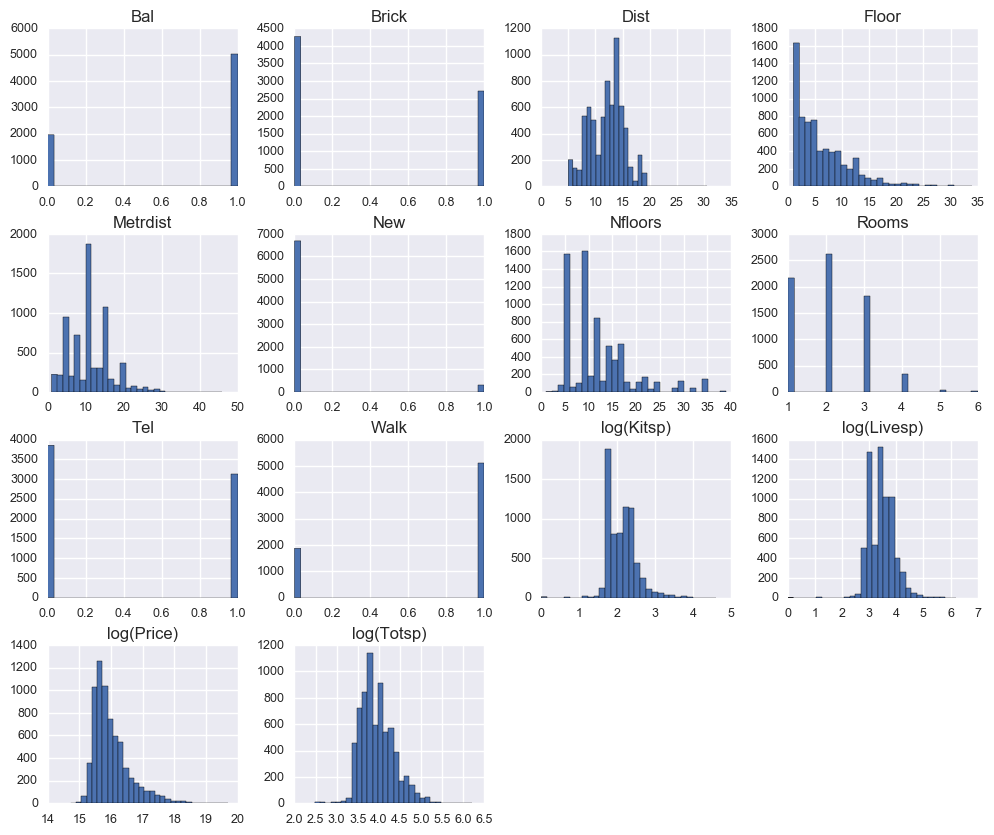

In [20]:
data_log.hist(xlabelsize=9, ylabelsize=9, figsize=(12, 10), bins=30);

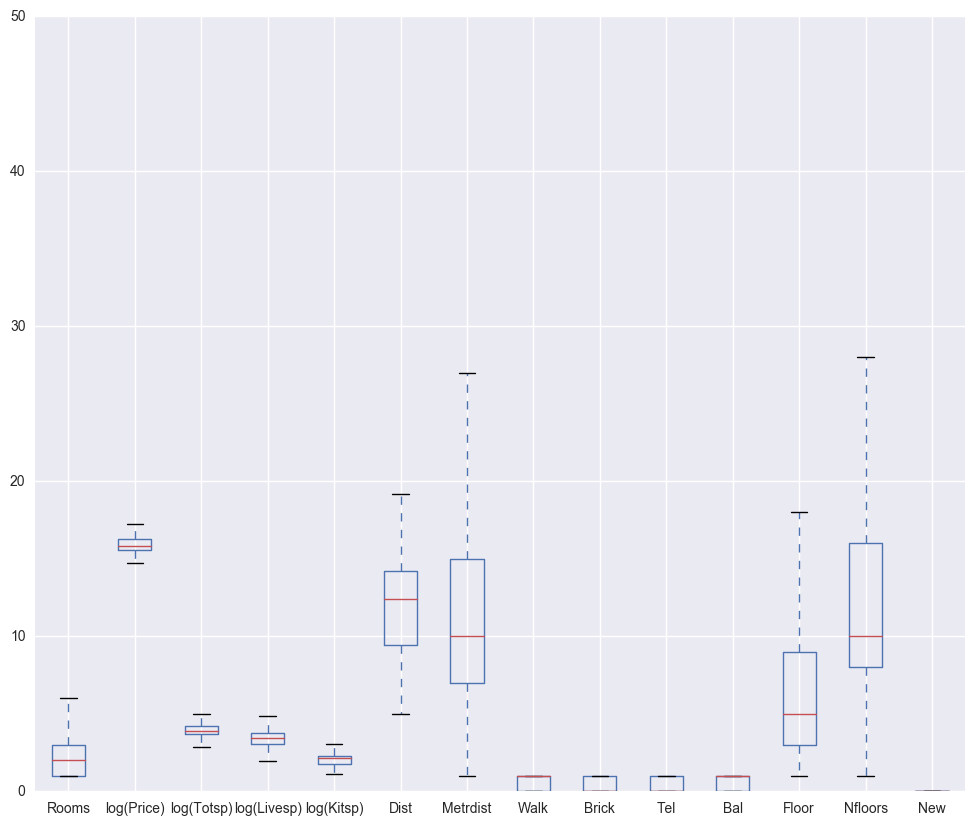

In [21]:
data_log.plot.box(figsize=(12, 10));

# 5 Корреляции

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5]),
 <a list of 14 Text xticklabel objects>)

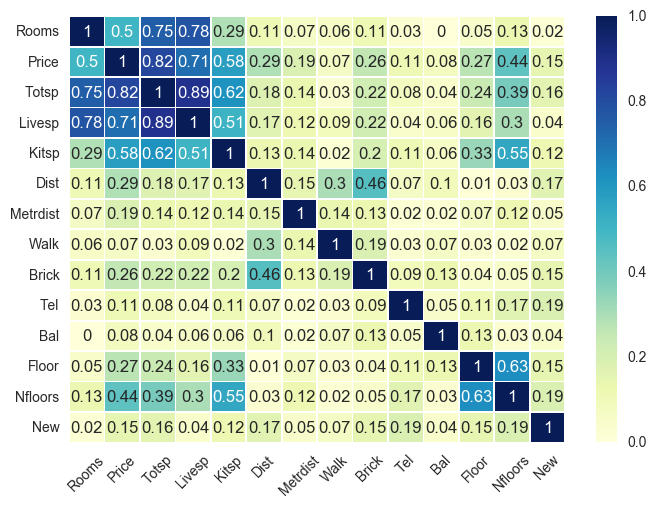

In [22]:
corr = abs(data.corr().round(2))
sns.set()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            annot=True, cmap='YlGnBu', linewidths=.5)
plt.xticks(rotation=45)

В соответствии с построенной таблицей, можно увидеть, что с целевой переменной (Price) неплохо коррелируют разные площади (Totsp/Livesp/Kitsp) - действительно, чем больше квартира, тем, наверное, выше цена. Также друг с другом коррелируют:

- Totsp, Livesp и Kitsp;

- Rooms и Totsp, Rooms и Livesp (больше комнат -> больше площадь, и наоборот);

- Floor и NFloors (номер этажа и количество этажей в доме - вот это я объяснить не могу)

- Kitsp и Nfloors (и это тоже)

Еще небольшая корреляция прослеживается между Price и Rooms (я думал, будет больше), Dist и Brick (!) и Price и Nfloors.

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5]),
 <a list of 14 Text xticklabel objects>)

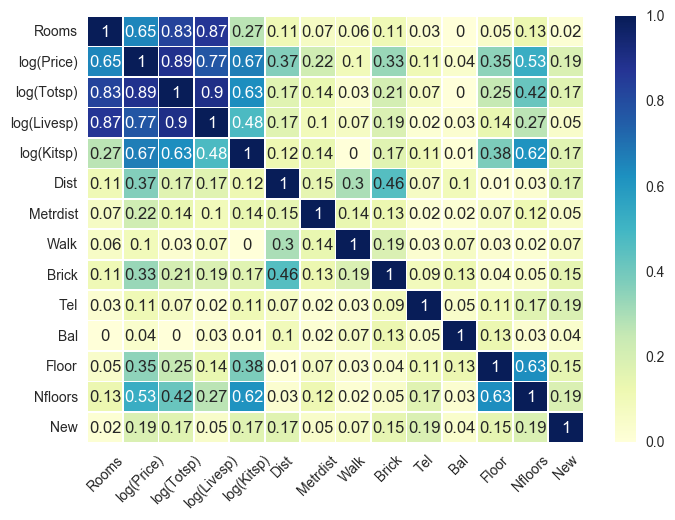

In [23]:
corr = abs(data_log.corr().round(2))
sns.set()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            annot=True, cmap='YlGnBu', linewidths=.5)
plt.xticks(rotation=45)

После логарифмирования корреляция между целевой переменной и Rooms возросла, а также немного видна корреляция с Nfloors.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


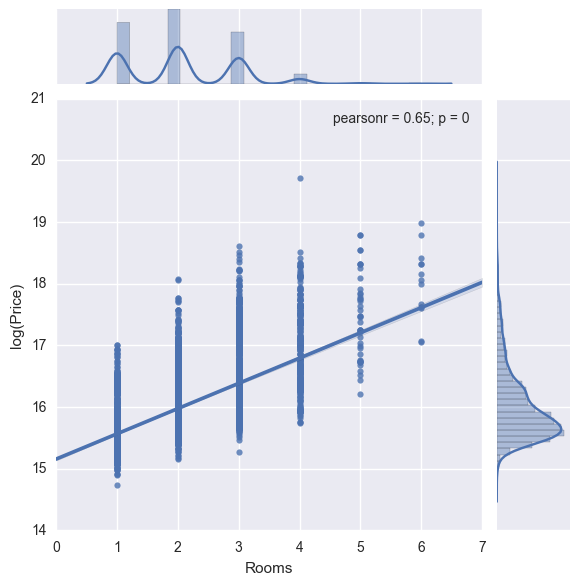

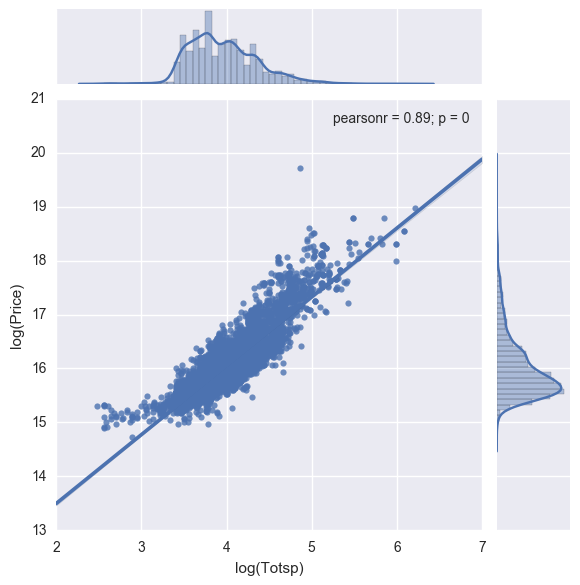

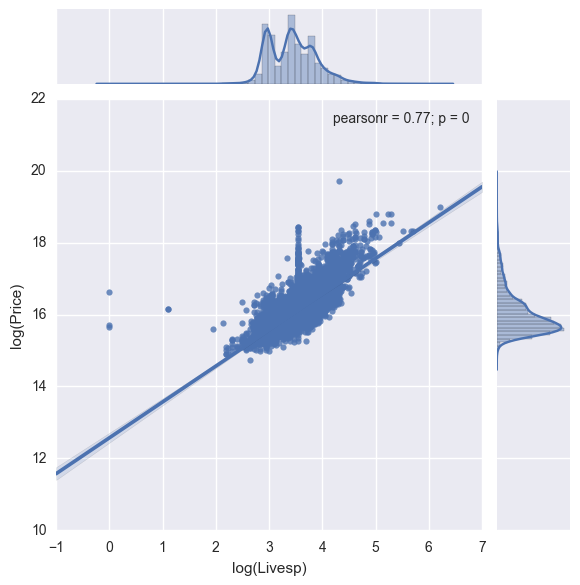

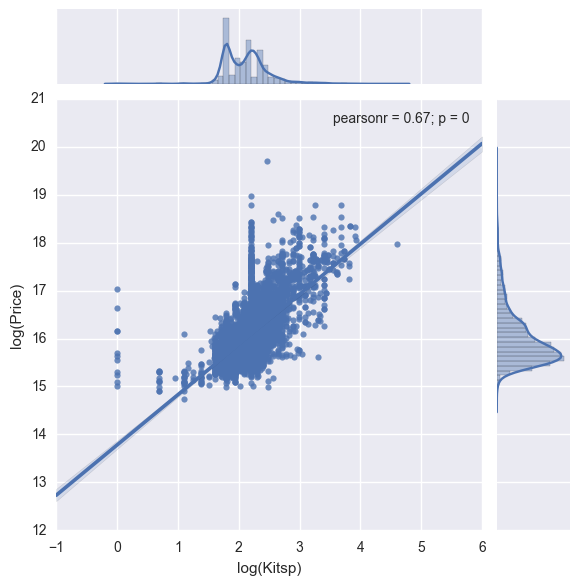

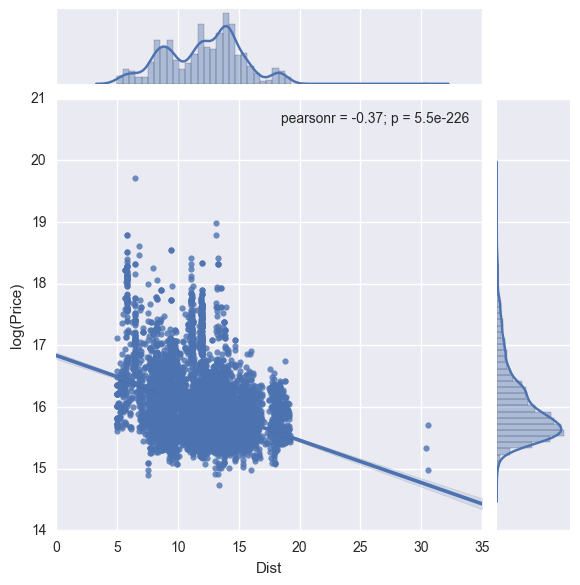

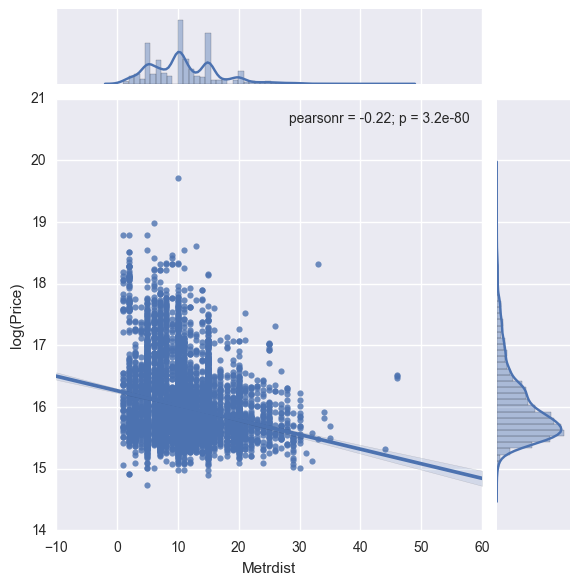

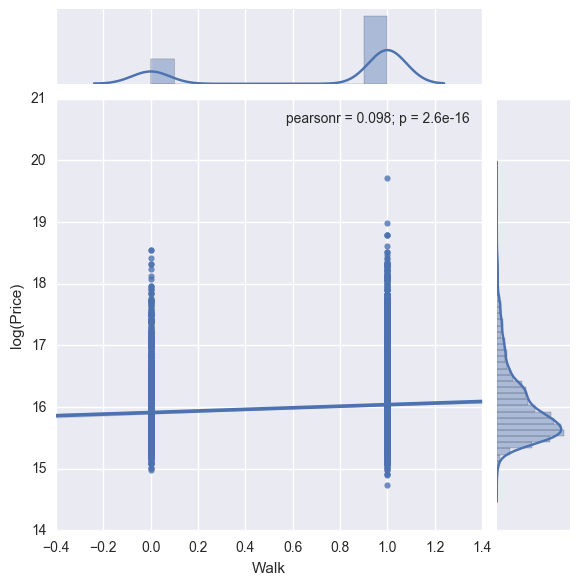

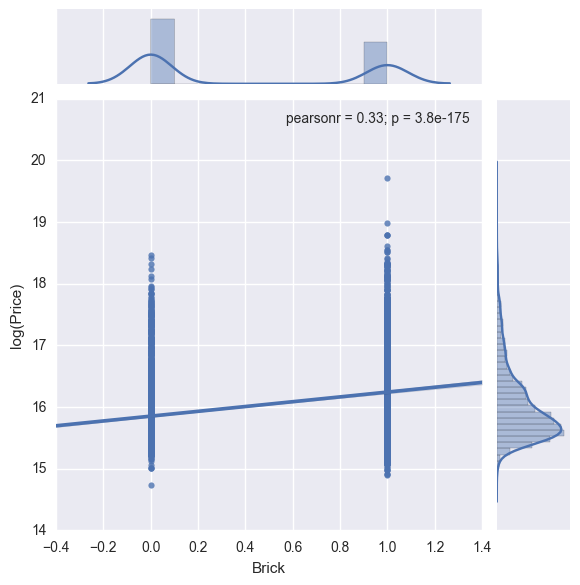

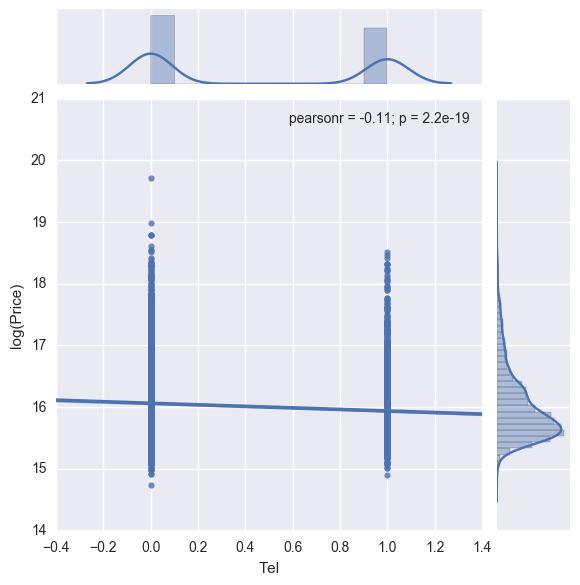

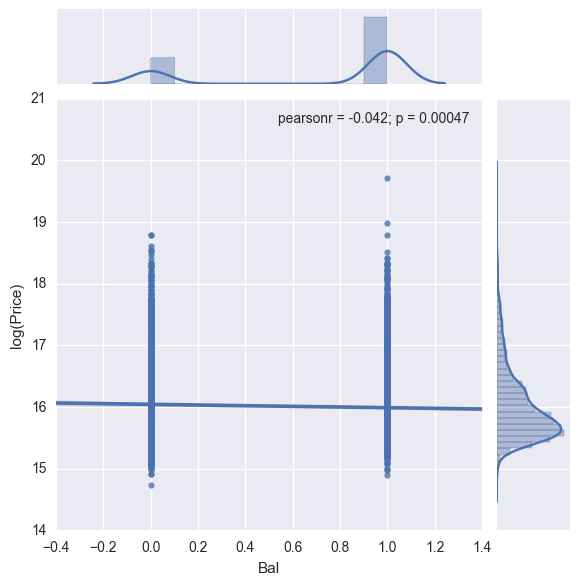

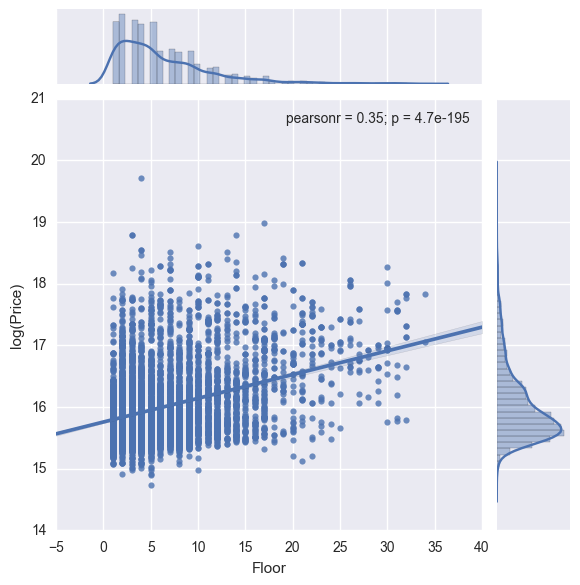

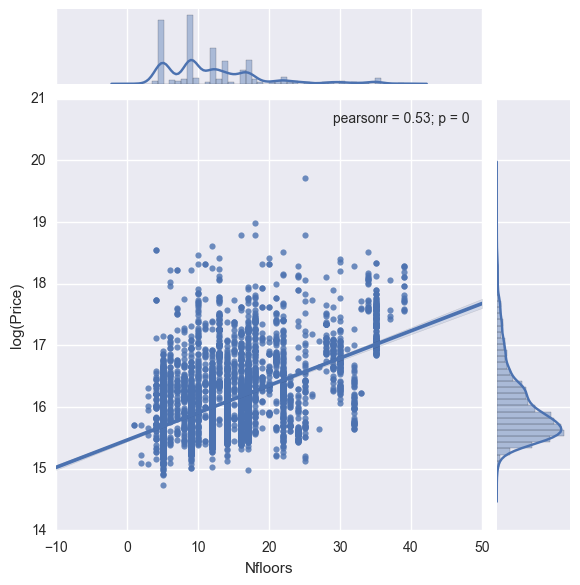

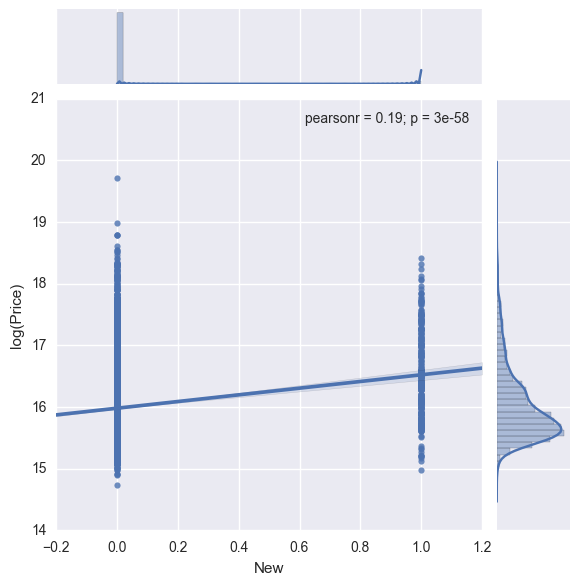

In [33]:
for x in data_log.drop('log(Price)', axis=1).columns:
    sns.jointplot(x=x, y='log(Price)', data=data_log, kind='reg')
plt.show()

# 6 Модели

Будем предсказывать логарифм цены. Объясняется это все той же гетероскедастичностью - когда в некоторых подвыборках разброс очень гигантский, а в некоторых очень маленький, алгоритм может работать плохо (где-то переобучаться, а где-то недообучаться). Да и значения ошибок выглядят более удобоваримо в связи с уменьшением масштаба.

In [24]:
X = data_log.drop('log(Price)', axis=1)
y = data_log['log(Price)']
print(X.shape)
print(y.shape)

(6994, 13)
(6994,)


Разделим выборку на обучающую и тестовую в отношении 80:20.

In [25]:
from sklearn.model_selection import train_test_split
random_state = np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
print(X_train.shape)
print(X_test.shape)

(5595, 13)
(1399, 13)


## 6.1 Простая линейная регрессия

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Для проверки качества будем использовать метрики RMSE и MAE.

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def accuracy_report(y_true, y_pred):
    print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_true, y_pred))))
    print('MAE: {:.3f}'.format(mean_absolute_error(y_true, y_pred)))
    plt.scatter(y_true, y_pred)
    plt.xlabel('Reality')
    plt.ylabel('Prediction')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--')
    plt.show()

RMSE: 0.183
MAE: 0.133


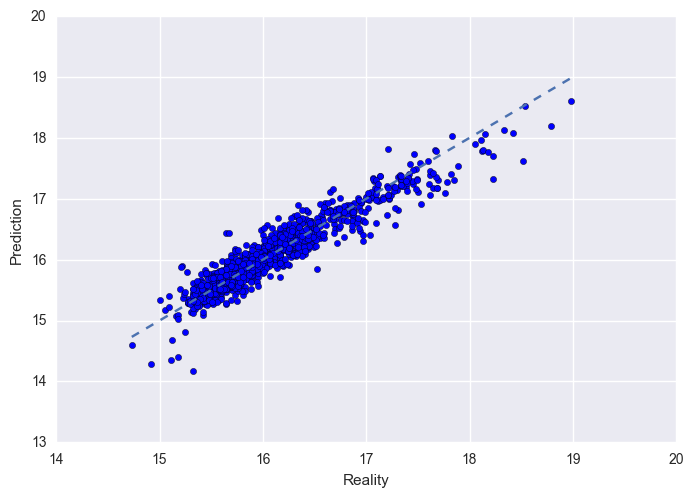

In [28]:
accuracy_report(y_test, lm.predict(X_test))

## 6.2 Lasso

In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
alphas = np.logspace(-8, 8, 17)
grid = GridSearchCV(estimator=Lasso(random_state=random_state), param_grid={'alpha': alphas},
                    scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print('Best RMSE: {}'.format(np.sqrt(np.abs(grid.best_score_))))
print('Best alpha: {}'.format(grid.best_estimator_.alpha))

Best RMSE: 0.19220484052474787
Best alpha: 1e-05


RMSE: 0.183
MAE: 0.133


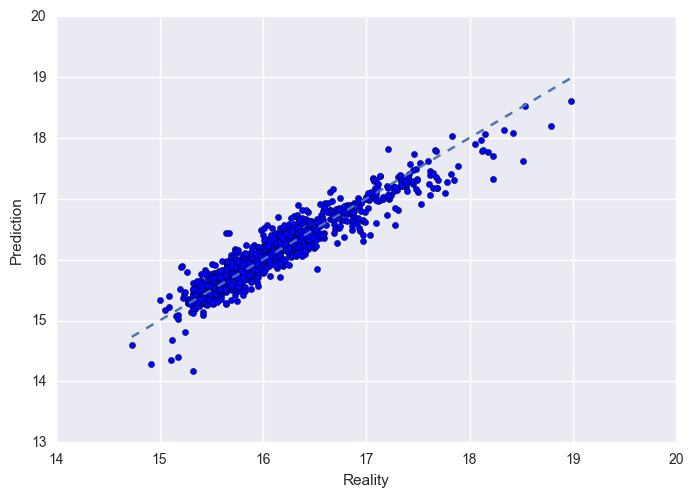

In [30]:
lasso = Lasso(alpha=grid.best_estimator_.alpha, random_state=random_state)
lasso.fit(X_train, y_train)
accuracy_report(y_test, lasso.predict(X_test))

## 6.3 Ridge

In [31]:
from sklearn.linear_model import Ridge
grid = GridSearchCV(estimator=Ridge(random_state=random_state), param_grid={'alpha': alphas},
                    scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print('Best RMSE: {}'.format(np.sqrt(np.abs(grid.best_score_))))
print('Best alpha: {}'.format(grid.best_estimator_.alpha))

Best RMSE: 0.19220530765307983
Best alpha: 1e-08


RMSE: 0.183
MAE: 0.133


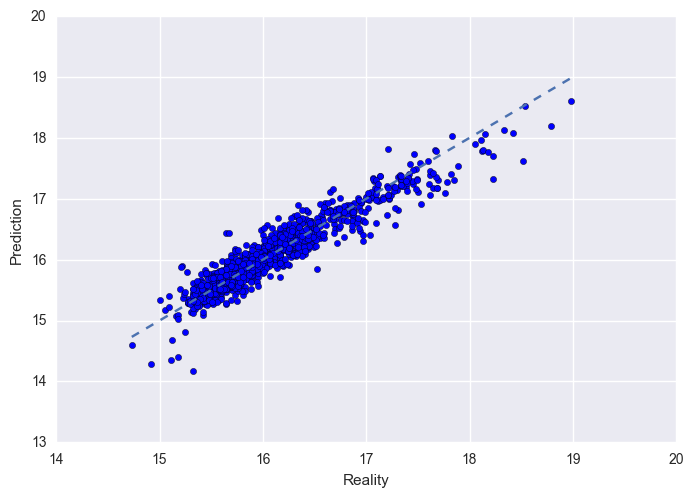

In [32]:
ridge = Ridge(alpha=grid.best_estimator_.alpha, random_state=random_state)
ridge.fit(X_train, y_train)
accuracy_report(y_test, ridge.predict(X_test))

## 6.4 Random Forest

Сначала посмотрим на качество случайного леса со всеми параметрами по умолчанию.

RMSE: 0.134
MAE: 0.094


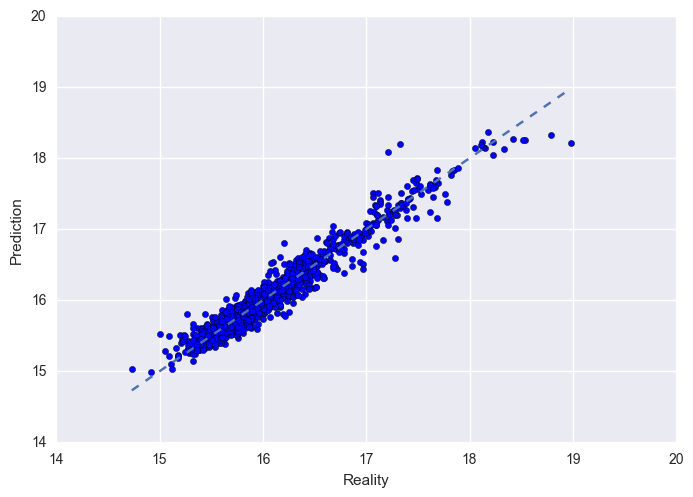

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=random_state)
rf.fit(X_train, y_train)
accuracy_report(y_test, rf.predict(X_test))

Теперь подберем гиперпараметры с помощью кросс-валидации.

In [33]:
import time
param_grid={'n_estimators': np.arange(10, 101, 10)}
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=random_state),
                    param_grid=param_grid, scoring='neg_mean_squared_error',
                    n_jobs=4, verbose=2)
start_time = time.time()
grid.fit(X_train, y_train)
print('Best RMSE: {}'.format(np.sqrt(np.abs(grid.best_score_))))
print('Best n_estimators: {}'.format(grid.best_estimator_.n_estimators))
print('Time spent: {} minutes'.format((time.time() - start_time) / 60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  1.9min finished


Best RMSE: 0.13694599333250093
Best n_estimators: 80
Time spent: 2.2907643556594848 minutes


In [47]:
param_grid={'max_depth': range(41, 62, 2), 'min_samples_split': range(2, 9, 2)}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=80, random_state=random_state),
                    param_grid=param_grid, scoring='neg_mean_squared_error',
                    n_jobs=4, verbose=2)
start_time = time.time()
grid.fit(X_train, y_train)
print('Best RMSE: {}'.format(np.sqrt(np.abs(grid.best_score_))))
print('Best max_depth: {}'.format(grid.best_estimator_.max_depth))
print('Best min_samples_split: {}'.format(grid.best_estimator_.min_samples_split))
print('Time spent: {} minutes'.format((time.time() - start_time) / 60))

Fitting 3 folds for each of 44 candidates, totalling 132 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 132 out of 132 | elapsed:  8.0min finished


Best RMSE: 0.13672983326572866
Best max_depth: 49
Best min_samples_split: 2
Time spent: 8.235321033000947 minutes


In [52]:
param_grid={'min_samples_leaf': range(1, 10, 2)}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=80, max_depth=49,
                                                    min_samples_split=2, random_state=random_state),
                    param_grid=param_grid, scoring='neg_mean_squared_error',
                    n_jobs=4, verbose=2)
start_time = time.time()
grid.fit(X_train, y_train)
print('Best RMSE: {}'.format(np.sqrt(np.abs(grid.best_score_))))
print('Best min_samples_leaf: {}'.format(grid.best_estimator_.min_samples_leaf))
print('Time spent: {} minutes'.format((time.time() - start_time) / 60))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  1.0min finished


Best RMSE: 0.13801566620567843
Best min_samples_leaf: 1
Time spent: 1.2986076116561889 minutes


In [54]:
param_grid={'max_features': range(1, 14)}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=80, max_depth=49,
                                                    min_samples_split=2, min_samples_leaf=1,
                                                    random_state=random_state),
                    param_grid=param_grid, scoring='neg_mean_squared_error',
                    n_jobs=4, verbose=2)
start_time = time.time()
grid.fit(X_train, y_train)
print('Best RMSE: {}'.format(np.sqrt(np.abs(grid.best_score_))))
print('Best max_features: {}'.format(grid.best_estimator_.max_features))
print('Time spent: {} minutes'.format((time.time() - start_time) / 60))

Fitting 3 folds for each of 13 candidates, totalling 39 fits


[Parallel(n_jobs=4)]: Done  39 out of  39 | elapsed:  2.0min finished


Best RMSE: 0.13670050330528227
Best max_features: 10
Time spent: 2.160356899102529 minutes


In [55]:
param_grid={'n_estimators': range(60, 201, 10)}
grid = GridSearchCV(estimator=RandomForestRegressor(max_depth=49, min_samples_split=2,
                                                    min_samples_leaf=1, max_features=10,
                                                    random_state=random_state),
                    param_grid=param_grid, scoring='neg_mean_squared_error',
                    n_jobs=4, verbose=2)
start_time = time.time()
grid.fit(X_train, y_train)
print('Best RMSE: {}'.format(np.sqrt(np.abs(grid.best_score_))))
print('Best n_estimators: {}'.format(grid.best_estimator_.n_estimators))
print('Time spent: {} minutes'.format((time.time() - start_time) / 60))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:  4.3min finished


Best RMSE: 0.13620648486626094
Best n_estimators: 90
Time spent: 4.5254088362058 minutes


In [56]:
param_grid={'n_estimators': range(81, 100)}
grid = GridSearchCV(estimator=RandomForestRegressor(max_depth=49, min_samples_split=2,
                                                    min_samples_leaf=1, max_features=10,
                                                    random_state=random_state),
                    param_grid=param_grid, scoring='neg_mean_squared_error',
                    n_jobs=4, verbose=2)
start_time = time.time()
grid.fit(X_train, y_train)
print('Best RMSE: {}'.format(np.sqrt(np.abs(grid.best_score_))))
print('Best n_estimators: {}'.format(grid.best_estimator_.n_estimators))
print('Time spent: {} minutes'.format((time.time() - start_time) / 60))

Fitting 3 folds for each of 19 candidates, totalling 57 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done  57 out of  57 | elapsed:  3.9min finished


Best RMSE: 0.13658215604140078
Best n_estimators: 85
Time spent: 4.177272260189056 minutes


RMSE: 0.128
MAE: 0.090


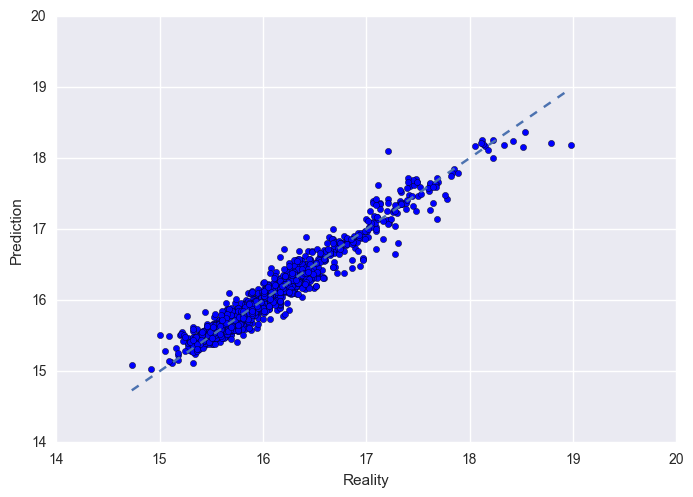

In [61]:
rf_best = RandomForestRegressor(n_estimators=85, max_depth=49, min_samples_split=2,
                                min_samples_leaf=1, max_features=10, random_state=random_state)
rf_best.fit(X_train, y_train)
accuracy_report(y_test, rf_best.predict(X_test))

Как видно, после подбора гиперпараметров ошибка уменьшилась.

Итак, регрессионные модели с данной задачей справляются хуже случайного леса.

# 7 Важность признаков

In [64]:
X.columns

Index(['Rooms', 'log(Totsp)', 'log(Livesp)', 'log(Kitsp)', 'Dist', 'Metrdist',
       'Walk', 'Brick', 'Tel', 'Bal', 'Floor', 'Nfloors', 'New'],
      dtype='object')

## 7.1 Lasso

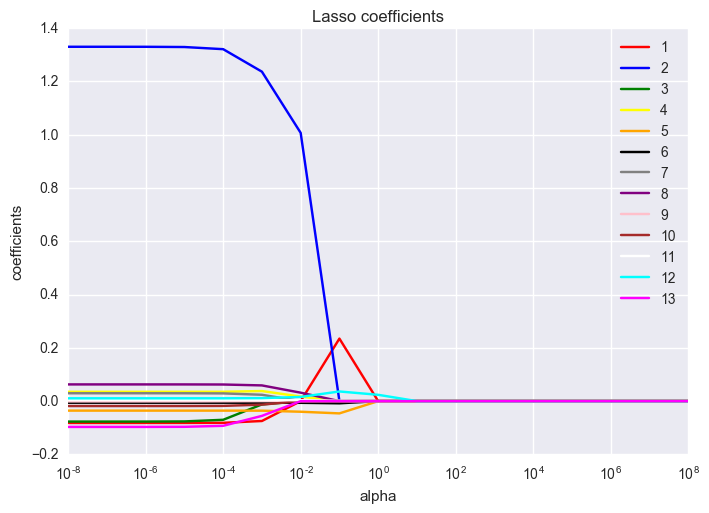

In [65]:
lasso_coef = []

# constructing regression for each value of the parameter lambda
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    lasso_coef.append(lasso.coef_)

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'black', 'gray', 'purple', 'pink', 'brown',
          'white', 'cyan', 'magenta']
plt.title("Lasso coefficients")
plt.xlabel("alpha")
plt.ylabel("coefficients")
# drawing a line for each coefficient of the regression model
for i in range(13):
    plt.plot(alphas, np.array(lasso_coef).T[i], color=colors[i])
plt.xscale('log')
plt.legend(np.arange(1, 14), loc='best')
plt.show()

Из графика видно, что самыми важными признаками, исходя из модели Lasso, являются 2 (log(Totsp)) и 1 (Rooms, но только при alpha от $10^2$ до $1$). Все остальные признаки по сравнению с ними практически не вносят вклада.

## 7.2 Ridge

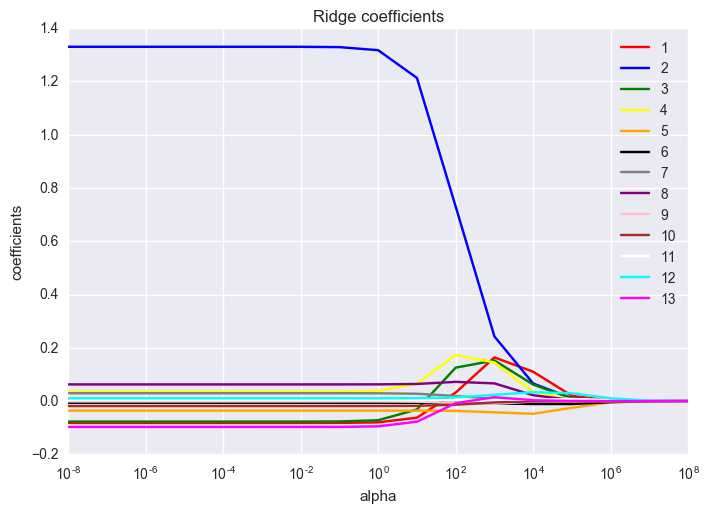

In [67]:
ridge_coef = []

# constructing regression for each value of the parameter lambda
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    ridge_coef.append(ridge.coef_)

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'black', 'gray', 'purple', 'pink', 'brown',
          'white', 'cyan', 'magenta']
plt.title("Ridge coefficients")
plt.xlabel("alpha")
plt.ylabel("coefficients")
# drawing a line for each coefficient of the regression model
for i in range(13):
    plt.plot(alphas, np.array(ridge_coef).T[i], color=colors[i])
plt.xscale('log')
plt.legend(np.arange(1, 14), loc='best')
plt.show()

Исходя из графика в случае модели Ridge, признак log(Totsp) все еще вносит наибольший вклад в модель, но при alpha примерно от $10$ до $10^4$ еще какой-то вклад вносят 1 (Rooms), 3 (log(Livesp)) и 4 (log(Kitsp)).

## 7.3 Random Forest

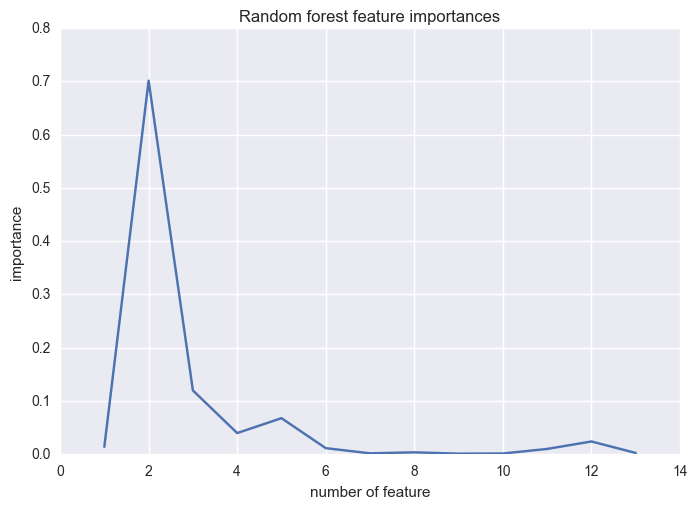

In [74]:
plt.plot(np.arange(1, 14), rf_best.feature_importances_)
plt.title("Random forest feature importances")
plt.xlabel("number of feature")
plt.ylabel("importance")
plt.show()

Из этого графика видно, что на целевую переменную больше всего влияет признак 2, а также небольшой вклад вносят 3, 4 и, внезапно, 5 (Dist).

Итак, после использования нескольких подходов были выявлены важные признаки, которые влияют на целевую переменную (в порядке убывания важности):

- log(Totsp) (самый важный признак)

- log(Livesp)

- log(Kitsp)

- Rooms

- Dist

- все остальное